<a href="https://colab.research.google.com/github/neerajvashistha/AI-and-ML./blob/master/unit4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
####
#Bernoulli Naive Bayes
####

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB

# For reproducibility
np.random.seed(1000)
nb_samples = 300

In [0]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

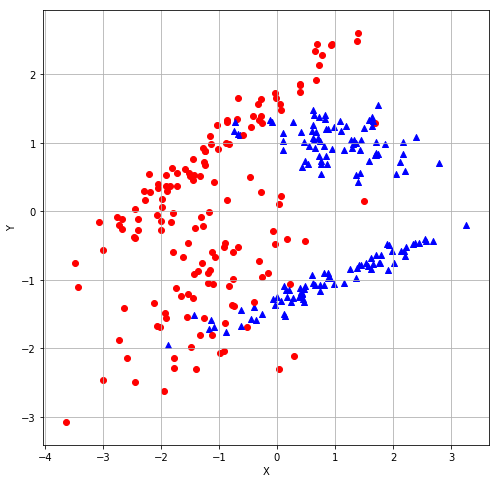

Bernoulli Naive Bayes score: 0.840


In [0]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

# Show dataset
show_dataset(X, Y)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Create and train Bernoulli Naive Bayes classifier
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)

print('Bernoulli Naive Bayes score: %.3f' % bnb.score(X_test, Y_test))

In [0]:
bnb_scores = cross_val_score(bnb, X, Y, scoring='accuracy', cv=10)
print('Bernoulli Naive Bayes CV average score: %.3f' % bnb_scores.mean())

# Predict some values
data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Yp = bnb.predict(data)
print(Yp)


Bernoulli Naive Bayes CV average score: 0.853
[0 0 1 1]


In [0]:
####
#Multinomial NB
####

In [0]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [0]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [0]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

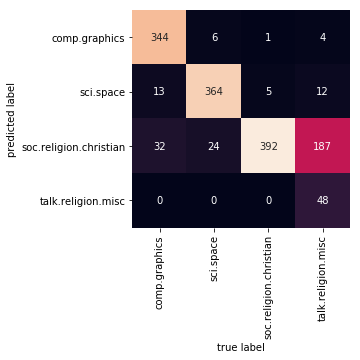

In [0]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [0]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [0]:
print(predict_category('sending a payload to the ISS'))

sci.space


In [0]:
print(predict_category('discussing islam vs atheism'))

soc.religion.christian


In [0]:
print(predict_category('determining the screen resolution'))

comp.graphics


In [0]:
####
#Gaussian NB vs Logistic Reg on ROC
####

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# For reproducibility
np.random.seed(1000)
nb_samples = 300

In [0]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

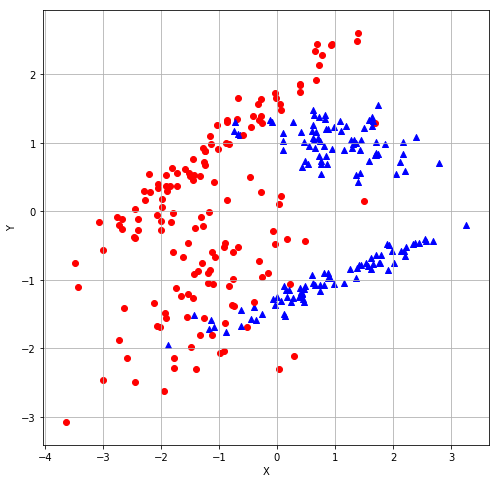

In [0]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0)

# Show dataset
show_dataset(X, Y)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [0]:
# Create and train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# Create and train a Logistic regressor (for comparison)
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
# Compute ROC Curve
Y_gnb_score = gnb.predict_proba(X_test)
Y_lr_score = lr.decision_function(X_test)

fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(Y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, Y_lr_score)

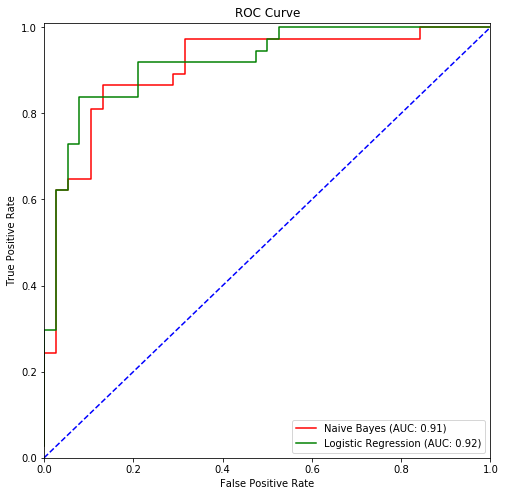

In [0]:
# Plot ROC Curve
plt.figure(figsize=(8, 8))

plt.plot(fpr_gnb, tpr_gnb, color='red', label='Naive Bayes (AUC: %.2f)' % auc(fpr_gnb, tpr_gnb))
plt.plot(fpr_lr, tpr_lr, color='green', label='Logistic Regression (AUC: %.2f)' % auc(fpr_lr, tpr_lr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

In [0]:
####
# Multinomial NB vs Gaussian NB
####

In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [0]:
digits = load_digits()

In [0]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [0]:
cross_val_score(gnb, digits.data, digits.target, scoring='accuracy',
cv=10).mean()

0.8103537583567821

In [0]:
cross_val_score(mnb, digits.data, digits.target, scoring='accuracy',
cv=10).mean()

0.8819396216300838

In [0]:
####
#Linear SVM
####

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# For reproducibility
np.random.seed(10)
nb_samples = 500

In [0]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

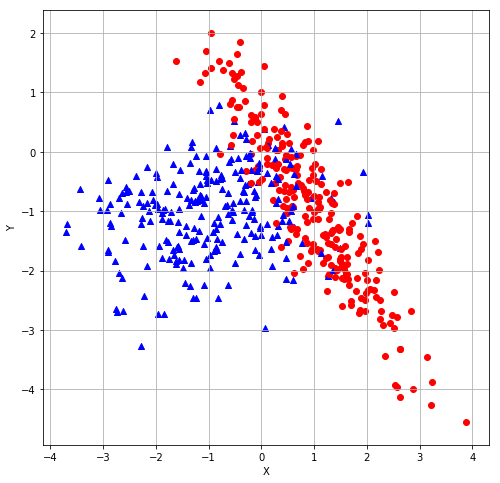

In [0]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,n_clusters_per_class=1)

# Show dataset
show_dataset(X, Y)

In [0]:
# Create a SVM with linear kernel
svc = SVC(kernel='linear')

# Compute CV score
svc_scores = cross_val_score(svc, X, Y, scoring='accuracy', cv=10)
print('Linear SVM CV average score: %.3f' % svc_scores.mean())

Linear SVM CV average score: 0.880


In [0]:
import multiprocessing
from sklearn.datasets import make_circles
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# For reproducibility
np.random.seed(1000)
nb_samples = 500

In [0]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

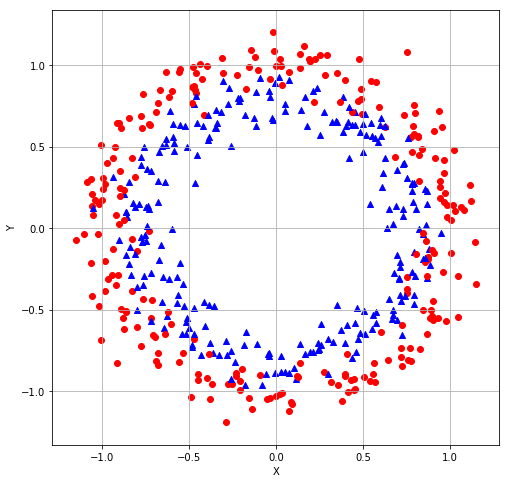

In [0]:
# Create datasets
X, Y = make_circles(n_samples=nb_samples, noise=0.1)

# Show dataset
show_dataset(X, Y)

In [0]:
# Define a param grid
param_grid = [
    {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]
    }
]

In [0]:
# Create a train grid search on SVM classifier
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(X, Y)

print(gs.best_estimator_)
print('Kernel SVM score: %.3f' % gs.best_score_)

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Kernel SVM score: 0.882


In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# For reproducibility
np.random.seed(1000)

In [0]:
digits = load_digits()

# Define a param grid
param_grid = [
    {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]
    }
]

# Create a train grid search on SVM classifier
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(digits.data, digits.target)

print(gs.best_estimator_)
print('Kernel SVM score: %.3f' % gs.best_score_)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Kernel SVM score: 0.979


In [0]:
import numpy as np
import multiprocessing
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import datasets
data = datasets.fetch_olivetti_faces()
# For reproducibility
np.random.seed(1000)

In [0]:
# Load dataset
faces = data

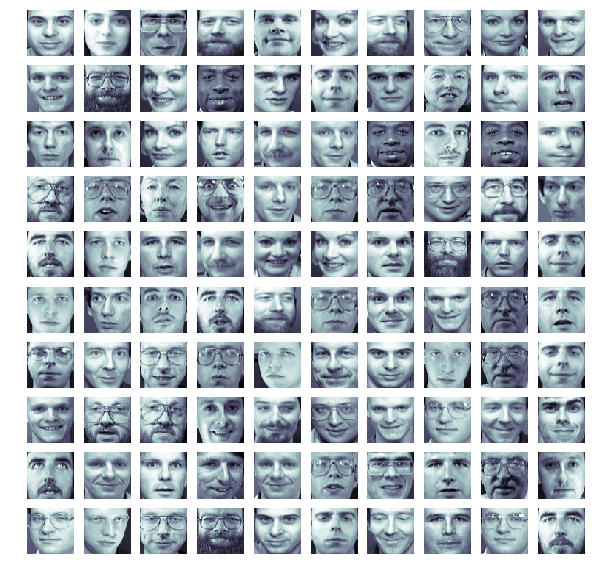

In [0]:
# Show some random digits
fig, ax = plt.subplots(10, 10, figsize=(10, 10))

for i in range(10):
    for j in range(10):
        ax[i, j].set_axis_off()
        ax[i, j].imshow(faces.images[np.random.randint(0, 400)], cmap=plt.cm.bone)


plt.show()

In [0]:
# Define a param grid
param_grid = [
    {
        'kernel': ['rbf', 'poly'],
        'C': [0.1, 0.5, 1.0, 1.5],
        'degree': [2, 3, 4, 5],
        'gamma': [0.001, 0.01, 0.1, 0.5]
    }
]

In [0]:
# Create a train grid search on SVM classifier
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(faces.data, faces.target)

print(gs.best_estimator_)
print('Kernel SVM score: %.3f' % gs.best_score_)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Kernel SVM score: 0.978


In [0]:
print(gs.best_score_)

0.9775


In [0]:
####
#Controlled SVM
####

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC, NuSVC
# For reproducibility
np.random.seed(800)
nb_samples = 2000

In [0]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

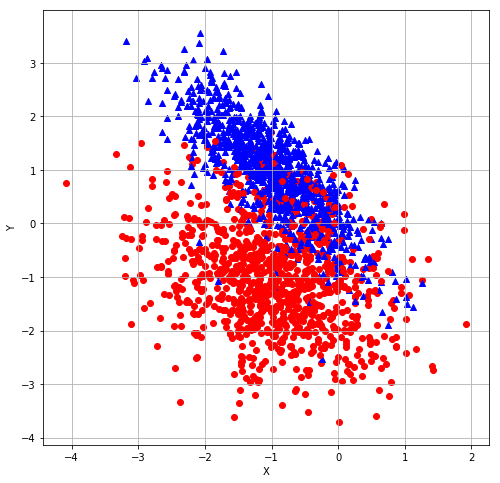

In [0]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1)

# Show dataset
show_dataset(X, Y)

In [0]:
# Create and train a linear SVM
svc = SVC(kernel='linear')
svc.fit(X, Y)
print('Number of support vectors: %d' % len(svc.support_vectors_))

Number of support vectors: 528


In [0]:
# Create and train a Nu-SVM classifier
nusvc = NuSVC(kernel='linear', nu=0.05)
nusvc.fit(X, Y)
print('Number of support vectors (nu=0.05): %d' % len(nusvc.support_vectors_))

Number of support vectors (nu=0.05): 102


In [0]:
cross_val_score(nusvc, X, Y, scoring='accuracy', cv=10).mean()

0.8

In [0]:
nusvc = NuSVC(kernel='linear', nu=0.15)
nusvc.fit(X, Y)
print(nusvc.support_vectors_.shape)

print(cross_val_score(nusvc, X, Y, scoring='accuracy', cv=10).mean())

(305, 2)
0.7314999999999999


In [0]:
param_grid = [
    {
        'nu': np.arange(0.05, 1.0, 0.5)
    }
]
gs = GridSearchCV(estimator=NuSVC(kernel='linear'), param_grid=param_grid, scoring='accuracy', cv=10, 
                  n_jobs=multiprocessing.cpu_count())
gs.fit(X, Y)
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_estimator_.support_vectors_.shape)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, nu=0.55, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)
0.886
(1100, 2)


In [0]:
####
#Support vector Regressor
####

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
# For reproducibility
np.random.seed(1000)
nb_samples = 50

In [0]:
def show_dataset(X, Y, Y_pred=None):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.scatter(X, Y)

    if Y_pred is not None:
        ax.plot(X, Y_pred, c='r')

    plt.show()

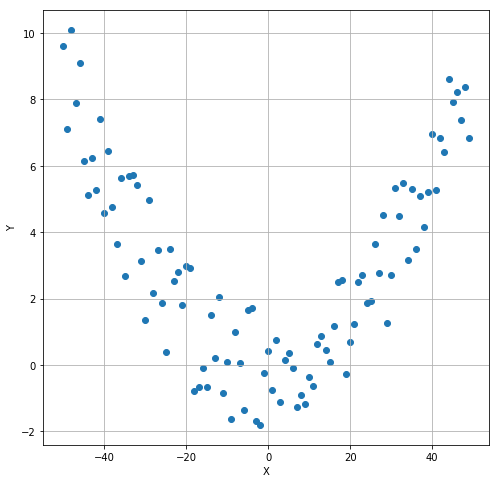

In [0]:
# Create dataset
X = np.arange(-nb_samples, nb_samples, 1)
Y = np.zeros(shape=(2 * nb_samples,))

for x in X:
    Y[int(x) + nb_samples] = np.power(x * 6, 2.0) / 1e4 + np.random.uniform(-2, 2)

# Show dataset
show_dataset(X, Y)

SVR CV average negative squared error: -1.353


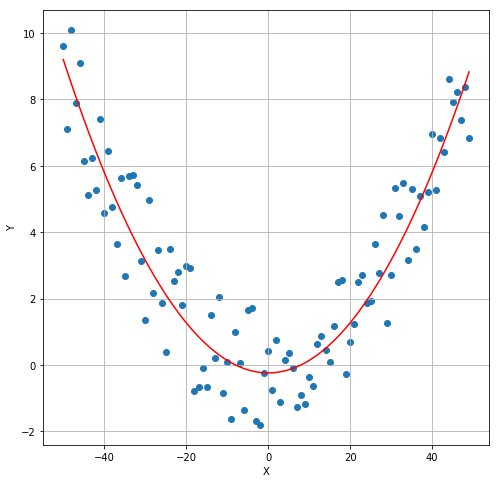

In [0]:
# Create and train a Support Vector regressor
svr = SVR(kernel='poly', degree=2, C=1.5, epsilon=0.5)
svr_scores = cross_val_score(svr, X.reshape((nb_samples*2, 1)), Y, scoring='neg_mean_squared_error', cv=10)
print('SVR CV average negative squared error: %.3f' % svr_scores.mean())

# Fit the model
svr.fit(X.reshape(-1, 1), Y.ravel())
Y_pred = svr.predict(X.reshape(-1, 1))

# Show the dataset together with the prediction
show_dataset(X, Y, Y_pred)